# Data Understanding

## Import Libraries

In [247]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Data Loading

Source: [Indonesia Tourism Destination](https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination?select=tourism_with_id.csv)

In [2]:
place_df = pd.read_csv("https://raw.githubusercontent.com/eru2024/laskarai-mlt-recommendationsystem/refs/heads/main/dataset/tourism_with_id.csv")
place_df.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [3]:
user_df = pd.read_csv("https://raw.githubusercontent.com/eru2024/laskarai-mlt-recommendationsystem/refs/heads/main/dataset/user.csv")
user_df.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [4]:
rating_df = pd.read_csv("https://raw.githubusercontent.com/eru2024/laskarai-mlt-recommendationsystem/refs/heads/main/dataset/tourism_rating.csv")
rating_df.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [5]:
print('Number of tourism places:', len(place_df))
print('Number of users:', len(user_df))
print('Number of ratings:', len(rating_df))

Number of tourism places: 437
Number of users: 300
Number of ratings: 10000


# Exploratory Data Analysis

## Variable Description


This dataset also consists of 3 variables, namely:

* `place`: contains information on tourist attractions in 5 major cities in Indonesia totaling ~400
* `user`: contains dummy user data to make recommendation features based on user
* `rating`: contains 3 columns, namely the user, the place, and the rating given, serves to create a recommendation system based on the rating

## Univariate Analysis

In [6]:
# Custom function for summarize dataset structure
def get_dataframe_summary(dfs):
  summary_data = []

  for df_name, df in dfs.items():
    if not isinstance(df, pd.DataFrame):
      print(f"Warning: {df_name} is not a pandas DataFrame. Skipping.")
      continue

    for col_name in df.columns:
      summary_data.append({
          'DataFrame Name': df_name,
          'Column Name': col_name,
          'dtype': df[col_name].dtype,
          'Minimum Value': df[col_name].min() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Maximum Value': df[col_name].max() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Mean Value': df[col_name].mean() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Median Value': df[col_name].median() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Standard Deviation': df[col_name].std() if pd.api.types.is_numeric_dtype(df[col_name]) else np.nan,
          'Number of Rows': len(df),
          'Number of Missing Values': df[col_name].isnull().sum(),
          'Number of Unique Values': df[col_name].nunique(),
          'Number of Duplicated Values': df.duplicated(subset=[col_name]).sum()
      })

  return pd.DataFrame(summary_data)

In [192]:
# Apply function on avalaible dataframes
dataframes = {'place_df': place_df,
              'user_df': user_df,
              'rating_df': rating_df}

summary_dataset = get_dataframe_summary(dataframes)
print(summary_dataset)

   DataFrame Name    Column Name     dtype  Minimum Value  Maximum Value  \
0        place_df       Place_Id     int64       1.000000     437.000000   
1        place_df     Place_Name    object            NaN            NaN   
2        place_df    Description    object            NaN            NaN   
3        place_df       Category    object            NaN            NaN   
4        place_df           City    object            NaN            NaN   
5        place_df          Price     int64       0.000000  900000.000000   
6        place_df         Rating   float64       3.400000       5.000000   
7        place_df   Time_Minutes   float64      10.000000     360.000000   
8        place_df     Coordinate    object            NaN            NaN   
9        place_df            Lat   float64      -8.197894       1.078880   
10       place_df           Long   float64     103.931398     112.821662   
11       place_df    Unnamed: 11   float64            NaN            NaN   
12       pla

In [8]:
print('Unique Categories:', place_df['Category'].unique())
print('Unique Cities:', place_df['City'].unique())

Unique Categories: ['Budaya' 'Taman Hiburan' 'Cagar Alam' 'Bahari' 'Pusat Perbelanjaan'
 'Tempat Ibadah']
Unique Cities: ['Jakarta' 'Yogyakarta' 'Bandung' 'Semarang' 'Surabaya']


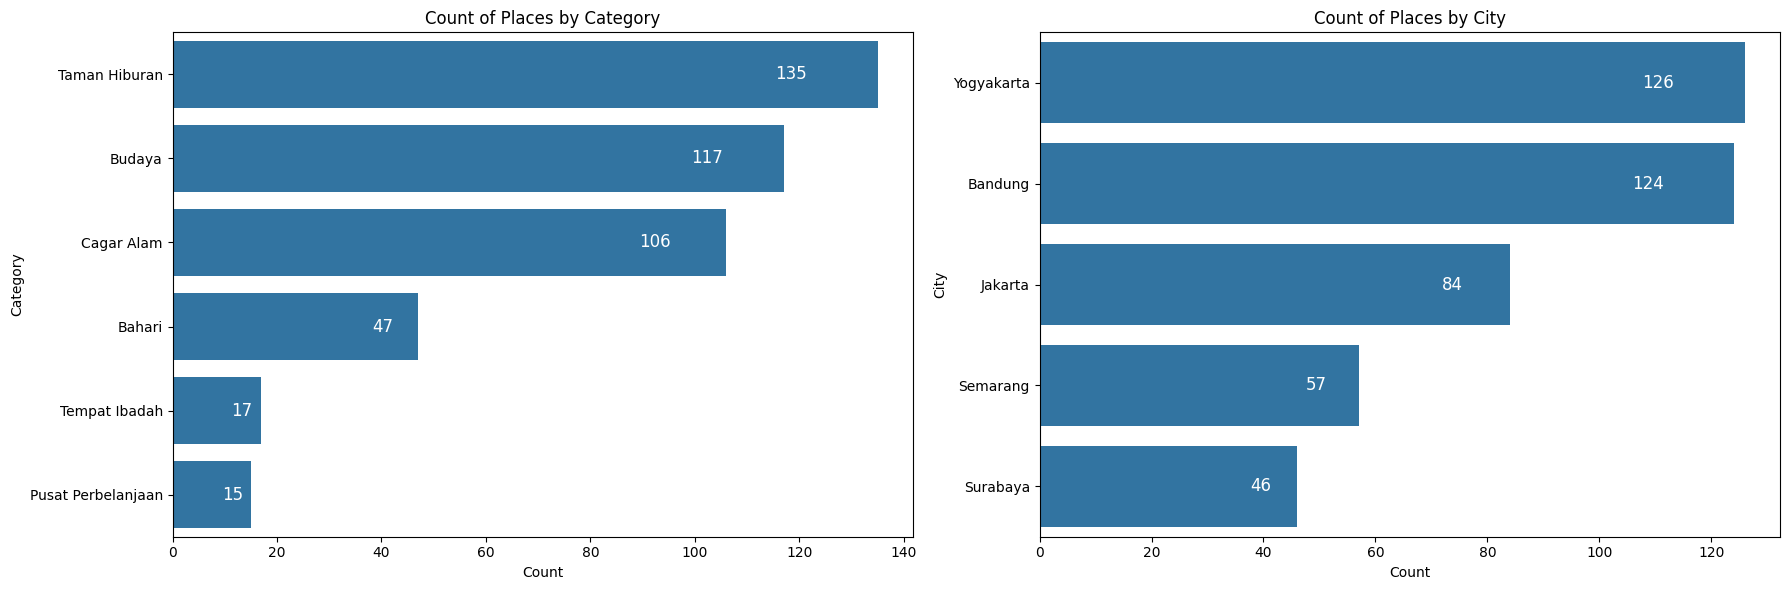

In [195]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Categories
sns.countplot(ax=axes[0], y='Category', data=place_df, order=place_df['Category'].value_counts().index)
axes[0].set_title('Count of Places by Category')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Category')

# Add data labels for Categories plot
for patch in axes[0].patches:
    width = patch.get_width()
    height = patch.get_height()
    x = width - width * 0.1  # position label slightly inside the bar (10% from right edge)
    y = patch.get_y() + height / 2
    axes[0].text(x, y, f'{int(width)}', va='center', ha='right', color='white', fontsize=12)

# Plot for Cities
sns.countplot(ax=axes[1], y='City', data=place_df, order=place_df['City'].value_counts().index)
axes[1].set_title('Count of Places by City')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('City')

# Add data labels for Cities plot
for patch in axes[1].patches:
    width = patch.get_width()
    height = patch.get_height()
    x = width - width * 0.1
    y = patch.get_y() + height / 2
    axes[1].text(x, y, f'{int(width)}', va='center', ha='right', color='white', fontsize=12)

plt.tight_layout()
plt.show()

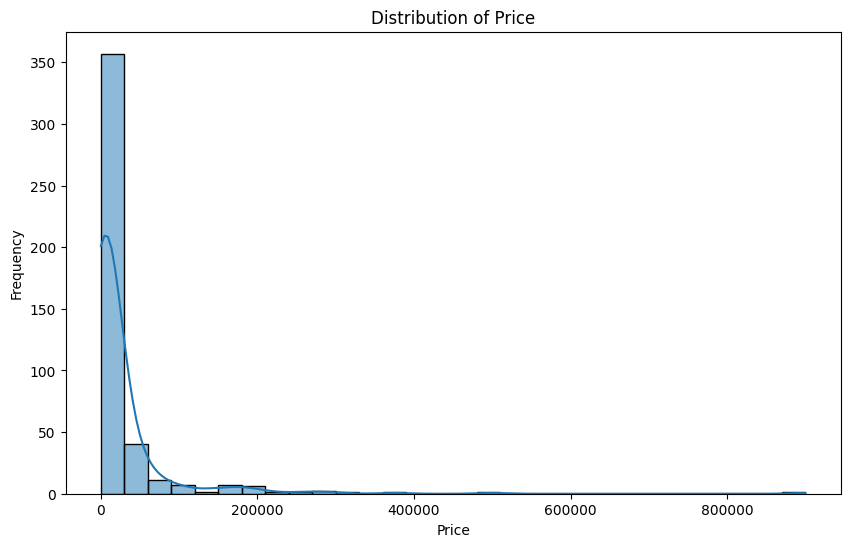

In [9]:
# Show histogram of Price
plt.figure(figsize=(10, 6))
sns.histplot(data=place_df, x='Price', bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Based on summmary dataset, **`place_df`** shows that:

* `Place_Id`: Sequential integer IDs (1–437), no missing values.
* `Place_Name` / `Description`: Text fields, each fully populated with 437 unique entries.
* `Category`: Six distinct categories.
* `City`: Five distinct cities.
* `Price`: Integer values from 0 to 900000 IDR; mean ≈ 24653, median 5000, highly right-skewed.
* `Rating`: Float values [3.4–5.0]; mean 4.44, median 4.5, low variance.
* `Time_Minutes`: Float [10–360] with 232 missing (~53%); mean 82.6, median 60, moderate variance.
* `Lat` / `Long`: Geocoordinates spanning –8.20 to +1.08 latitude and 103.93–112.82 longitude.
* `Unnamed: 11`: 100% missing—no information.
* `Unnamed: 12`: Duplicate of Place_Id.

In [10]:
print('Unique Location:', user_df['Location'].unique())

Unique Location: ['Semarang, Jawa Tengah' 'Bekasi, Jawa Barat' 'Cirebon, Jawa Barat'
 'Lampung, Sumatera Selatan' 'Jakarta Utara, DKI Jakarta'
 'Jakarta Selatan, DKI Jakarta' 'Bandung, Jawa Barat'
 'Surabaya, Jawa Timur' 'Yogyakarta, DIY' 'Bogor, Jawa Barat'
 'Depok, Jawa Barat' 'Jakarta Pusat, DKI Jakarta'
 'Jakarta Timur, DKI Jakarta' 'Subang, Jawa Barat'
 'Jakarta Barat, DKI Jakarta' 'Palembang, Sumatera Selatan'
 'Sragen, Jawa Tengah' 'Ponorogo, Jawa Timur' 'Klaten, Jawa Tengah'
 'Solo, Jawa Tengah' 'Tanggerang, Banten' 'Serang, Banten'
 'Cilacap, Jawa Tengah' 'Kota Gede, DIY' 'Karawang, Jawa Barat'
 'Purwakarat, Jawa Barat' 'Nganjuk, Jawa Timur' 'Madura, Jawa Timur']


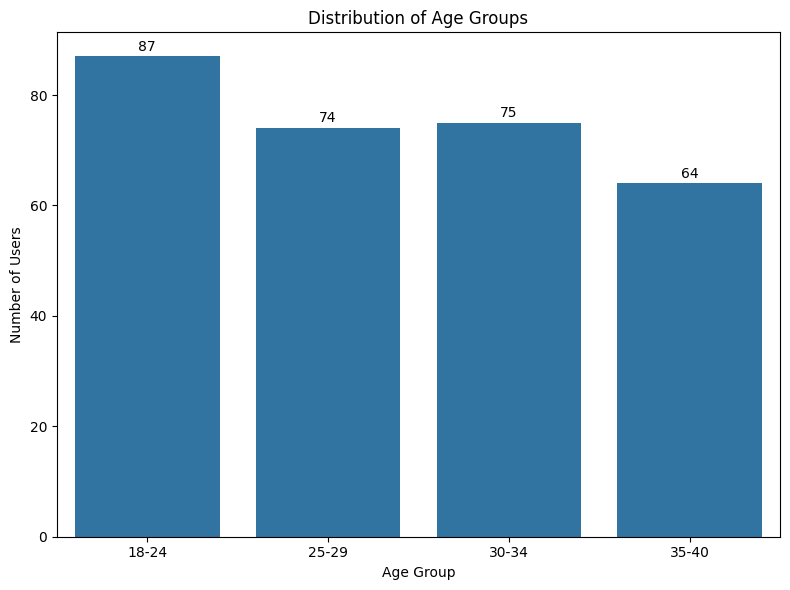

In [11]:
# Define age groups
bins = [18, 25, 30, 35, 41]  # upper bounds are exclusive in cut
labels = ['18-24', '25-29', '30-34', '35-40']

# Create a new column with age groups
user_df['Age_Group'] = pd.cut(user_df['Age'], bins=bins, labels=labels, right=False)

# Get the distribution of age groups
age_group_distribution = user_df['Age_Group'].value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=age_group_distribution.index, y=age_group_distribution.values)

# Add data labels
for i, value in enumerate(age_group_distribution.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom')

plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.tight_layout()
plt.show()

Based on summmary dataset, **`user_df`** shows that:

* `User_Id`: Unique integer IDs (1–300), no missing values.
* `Location`: 28 distinct strings; potential typos or inconsistent naming.
* `Age`: Integer [18–40]; mean 28.7, median 29, moderate dispersion.

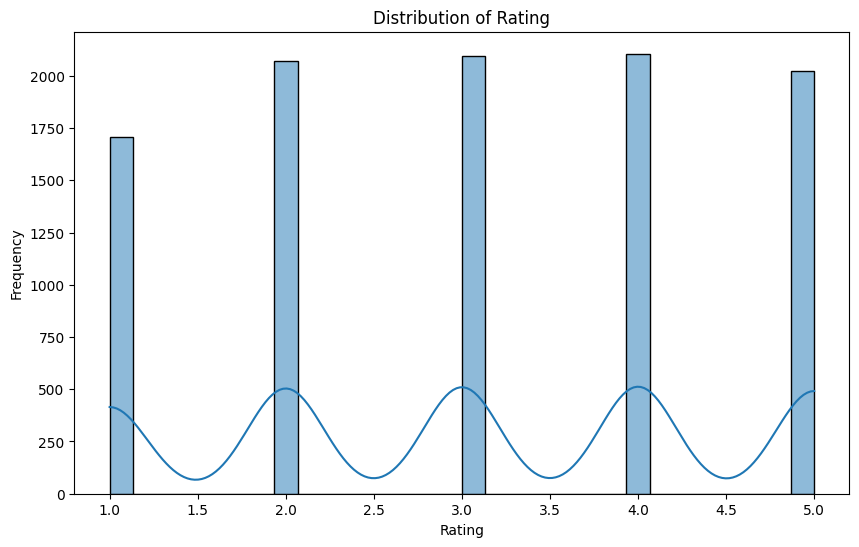

In [12]:
# Show histogram of Rating
plt.figure(figsize=(10, 6))
sns.histplot(data=rating_df, x='Place_Ratings', bins=30, kde=True)
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Based on summmary dataset, **`rating_df`** shows that:

* `User_Id` / `Place_Id`: References to users and places; 10 000 rows, no missing values.
* `Place_Ratings`: Integer ratings [1–5]; mean 3.07, median 3.0.

# Data Preparation

## Missing-Value Handling

**`place_df`**
* Drop `Unnamed: 11` (100% missing) because it contains no information; retaining it adds noise and increases dimensionality without benefit.

* Drop `Unnamed: 12` (duplicate of `Place_Id`) because it is redundant identifier and preserving only one Place_Id avoids confusion in joins and modeling.

* Drop `Time_Minutes` (232/437 missing, ~53%) because it has more than half of values are missing and making row deletion is likely to bias the dataset.

In [13]:
place_prep = place_df.drop(columns=['Unnamed: 11', 'Unnamed: 12', 'Time_Minutes']).copy()

## Outlier Handling

`place_df`
* Log-transform `Price` because `Price` distribution is heavily right-skewed (mean > median). Log transformation compresses high values, stabilizing variance and improving model convergence.
* Wisorize extreme `Price` becuase a few extremely expensive entries (up to 900000 IDR) can disproportionately influence distance- or similarity-based algorithms. Winsorization limits their impact while retaining relative ordering.

In [14]:
place_prep['Price_log'] = np.log1p(place_prep['Price'])

Percentiles of Price:
count       437.000000
mean      24652.173913
std       66446.374709
min           0.000000
25%           0.000000
50%        5000.000000
75%       20000.000000
90%       50000.000000
95%      117000.000000
99%      276400.000000
max      900000.000000
Name: Price, dtype: float64


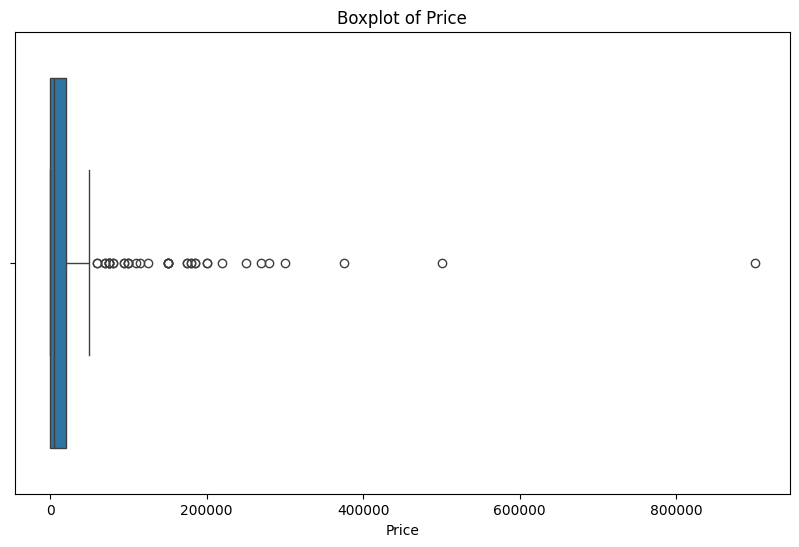

In [15]:
print("Percentiles of Price:")
print(place_prep['Price'].describe(percentiles=[.25, .5, .75, .90, .95, .99]))

plt.figure(figsize=(10, 6))
sns.boxplot(x=place_prep['Price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()


Percentiles of Price after capping:
count       437.000000
mean      18070.938215
std       30044.779306
min           0.000000
25%           0.000000
50%        5000.000000
75%       20000.000000
90%       50000.000000
95%      115400.000000
99%      117000.000000
max      117000.000000
Name: Price_cap, dtype: float64


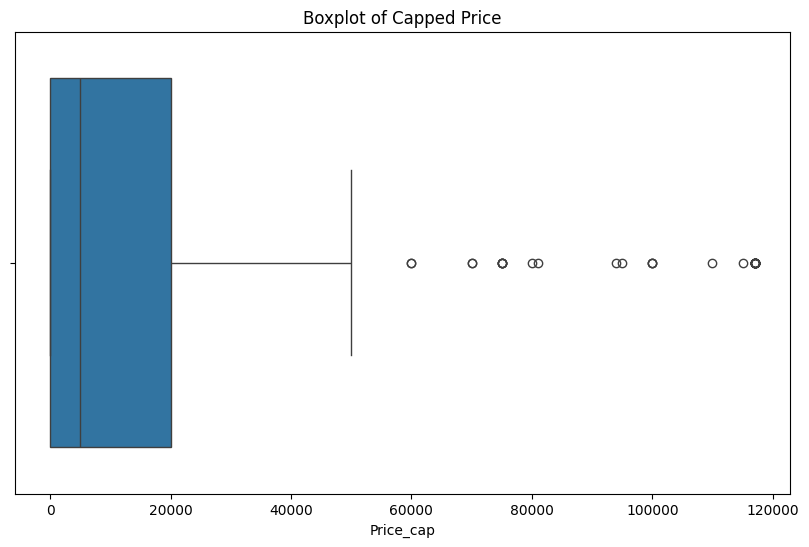

In [16]:
# Cap Price column at the 99th percentile
q95 = place_prep['Price'].quantile(0.95)
place_prep['Price_cap'] = place_prep['Price'].apply(lambda x: q95 if x > q95 else x)

print("\nPercentiles of Price after capping:")
print(place_prep['Price_cap'].describe(percentiles=[.25, .5, .75, .90, .95, .99]))

plt.figure(figsize=(10, 6))
sns.boxplot(x=place_prep['Price_cap'])
plt.title('Boxplot of Capped Price')
plt.xlabel('Price_cap')
plt.show()

**`user_df`**

* Standardize `Location` names because Inconsistent spellings (e.g., “Jakarta” vs. “DKI Jakarta”) fragment category levels, reducing encoding efficiency and potentially misleading geographic analyses.

In [17]:
print('Unique Location:', user_df['Location'].unique())

Unique Location: ['Semarang, Jawa Tengah' 'Bekasi, Jawa Barat' 'Cirebon, Jawa Barat'
 'Lampung, Sumatera Selatan' 'Jakarta Utara, DKI Jakarta'
 'Jakarta Selatan, DKI Jakarta' 'Bandung, Jawa Barat'
 'Surabaya, Jawa Timur' 'Yogyakarta, DIY' 'Bogor, Jawa Barat'
 'Depok, Jawa Barat' 'Jakarta Pusat, DKI Jakarta'
 'Jakarta Timur, DKI Jakarta' 'Subang, Jawa Barat'
 'Jakarta Barat, DKI Jakarta' 'Palembang, Sumatera Selatan'
 'Sragen, Jawa Tengah' 'Ponorogo, Jawa Timur' 'Klaten, Jawa Tengah'
 'Solo, Jawa Tengah' 'Tanggerang, Banten' 'Serang, Banten'
 'Cilacap, Jawa Tengah' 'Kota Gede, DIY' 'Karawang, Jawa Barat'
 'Purwakarat, Jawa Barat' 'Nganjuk, Jawa Timur' 'Madura, Jawa Timur']


In [18]:
user_prep = user_df.copy()

# Extract province from Location
user_prep['user_province'] = user_prep['Location'].str.split(', ').str[1]

# Check the result
print(user_prep[['Location', 'user_province']].head())

                    Location     user_province
0      Semarang, Jawa Tengah       Jawa Tengah
1         Bekasi, Jawa Barat        Jawa Barat
2        Cirebon, Jawa Barat        Jawa Barat
3         Bekasi, Jawa Barat        Jawa Barat
4  Lampung, Sumatera Selatan  Sumatera Selatan


In [19]:
user_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   User_Id        300 non-null    int64   
 1   Location       300 non-null    object  
 2   Age            300 non-null    int64   
 3   Age_Group      300 non-null    category
 4   user_province  300 non-null    object  
dtypes: category(1), int64(2), object(2)
memory usage: 10.0+ KB


## Duplicate-Value Handling

`rating_df`

* Check and remove duplicate ratings because multiple entries for the same (User_Id, Place_Id) can skew rating distributions. Removing or aggregating duplicates ensures each interaction is counted once.

In [20]:
# Find duplicate (User_Id, Place_Id) combinations
duplicates = rating_df[rating_df.duplicated(subset=['User_Id', 'Place_Id'], keep=False)]

# Display the duplicates
print("Duplicate User_Id and Place_Id combinations:")
print(duplicates.sort_values(by=['User_Id', 'Place_Id']))

Duplicate User_Id and Place_Id combinations:
      User_Id  Place_Id  Place_Ratings
25          1       328              2
29          1       328              2
46          2       208              5
48          2       208              3
42          2       437              5
...       ...       ...            ...
9947      299       407              1
9972      299       407              5
9976      300        69              4
9978      300        69              3
9983      300        69              1

[798 rows x 3 columns]


In [21]:
# Group by User_Id and Place_Id, and keep the row with the highest Place_Ratings
rating_prep = rating_df.sort_values('Place_Ratings', ascending=False).drop_duplicates(
    subset=['User_Id', 'Place_Id'], keep='first'
)

# Show summary
print(f"Original rating_df shape: {rating_df.shape}")
print(f"Cleaned shape: {rating_prep.shape}")

Original rating_df shape: (10000, 3)
Cleaned shape: (9597, 3)


## Add Columns to rating data

Add province name on `place_prep`

In [22]:
place_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place_Id     437 non-null    int64  
 1   Place_Name   437 non-null    object 
 2   Description  437 non-null    object 
 3   Category     437 non-null    object 
 4   City         437 non-null    object 
 5   Price        437 non-null    int64  
 6   Rating       437 non-null    float64
 7   Coordinate   437 non-null    object 
 8   Lat          437 non-null    float64
 9   Long         437 non-null    float64
 10  Price_log    437 non-null    float64
 11  Price_cap    437 non-null    float64
dtypes: float64(5), int64(2), object(5)
memory usage: 41.1+ KB


In [23]:
# Mapping of City to Province
city_to_province = {
    'Jakarta': 'DKI Jakarta',
    'Yogyakarta': 'DIY',
    'Bandung': 'Jawa Barat',
    'Semarang': 'Jawa Tengah',
    'Surabaya': 'Jawa Timur'
}

# Add 'place_province' column based on 'City'
place_prep['place_province'] = place_prep['City'].map(city_to_province)

# Optional: Check for any unmapped cities
unmapped = place_prep[place_prep['place_province'].isna()]['City'].unique()
if len(unmapped) > 0:
    print("Unmapped Cities:", unmapped)

Add all columns from `place_prep` based on `Place_Id` in `rating_prep`

In [24]:
# Merge place_prep into rating_prep based on Place_Id
rating_prep = rating_prep.merge(place_prep, on='Place_Id', how='left')

# Check the result
rating_prep.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long,Price_log,Price_cap,place_province
0,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,11.451061,94000.0,DKI Jakarta
1,300,144,5,Goa Jomblang,Gua Jomblang merupakan gua vertikal yang berti...,Cagar Alam,Yogyakarta,500000,4.6,"{'lat': -8.0281562, 'lng': 110.6383307}",-8.028156,110.638331,13.122365,117000.0,DIY
2,1,258,5,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,4.6,"{'lat': -6.902637899999999, 'lng': 107.619169}",-6.902638,107.619169,8.517393,5000.0,Jawa Barat
3,300,285,5,Taman Sejarah Bandung,Taman Sejarah Bandung adalah taman yang terlet...,Budaya,Bandung,0,4.6,"{'lat': -6.9103086, 'lng': 107.6098619}",-6.910309,107.609862,0.000000,0.0,Jawa Barat
4,1,393,5,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560,0.000000,0.0,Jawa Timur


In [25]:
rating_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User_Id         9597 non-null   int64  
 1   Place_Id        9597 non-null   int64  
 2   Place_Ratings   9597 non-null   int64  
 3   Place_Name      9597 non-null   object 
 4   Description     9597 non-null   object 
 5   Category        9597 non-null   object 
 6   City            9597 non-null   object 
 7   Price           9597 non-null   int64  
 8   Rating          9597 non-null   float64
 9   Coordinate      9597 non-null   object 
 10  Lat             9597 non-null   float64
 11  Long            9597 non-null   float64
 12  Price_log       9597 non-null   float64
 13  Price_cap       9597 non-null   float64
 14  place_province  9597 non-null   object 
dtypes: float64(5), int64(4), object(6)
memory usage: 1.1+ MB


Add all columns from `user_prep` based on `User_Id` in `rating_prep`

In [26]:
# Merge place_prep into rating_prep based on Place_Id
rating_prep = rating_prep.merge(user_prep , on='User_Id', how='left')

# Check the result
rating_prep.head()

,User_Id,Place_Id,Place_Ratings,Place_Name,Description,Category,City,Price,Rating,Coordinate,Lat,Long,Price_log,Price_cap,place_province,Location,Age,Age_Group,user_province
0,1,5,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,11.451061,94000.0,DKI Jakarta,"Semarang, Jawa Tengah",20,18-24,Jawa Tengah
1,300,144,5,Goa Jomblang,Gua Jomblang merupakan gua vertikal yang berti...,Cagar Alam,Yogyakarta,500000,4.6,"{'lat': -8.0281562, 'lng': 110.6383307}",-8.028156,110.638331,13.122365,117000.0,DIY,"Ponorogo, Jawa Timur",26,25-29,Jawa Timur
2,1,258,5,Museum Gedung Sate,Salah satu museum yang menjadi ikon kota ini a...,Budaya,Bandung,5000,4.6,"{'lat': -6.902637899999999, 'lng': 107.619169}",-6.902638,107.619169,8.517393,5000.0,Jawa Barat,"Semarang, Jawa Tengah",20,18-24,Jawa Tengah
3,300,285,5,Taman Sejarah Bandung,Taman Sejarah Bandung adalah taman yang terlet...,Budaya,Bandung,0,4.6,"{'lat': -6.9103086, 'lng': 107.6098619}",-6.910309,107.609862,0.000000,0.0,Jawa Barat,"Ponorogo, Jawa Timur",26,25-29,Jawa Timur
4,1,393,5,Taman Harmoni Keputih,Tempat tersebut ialah Taman Hatmoni Keputih Su...,Cagar Alam,Surabaya,0,4.4,"{'lat': -7.2952211, 'lng': 112.8035603}",-7.295221,112.803560,0.000000,0.0,Jawa Timur,"Semarang, Jawa Tengah",20,18-24,Jawa Tengah


In [27]:
rating_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9597 entries, 0 to 9596
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   User_Id         9597 non-null   int64   
 1   Place_Id        9597 non-null   int64   
 2   Place_Ratings   9597 non-null   int64   
 3   Place_Name      9597 non-null   object  
 4   Description     9597 non-null   object  
 5   Category        9597 non-null   object  
 6   City            9597 non-null   object  
 7   Price           9597 non-null   int64   
 8   Rating          9597 non-null   float64 
 9   Coordinate      9597 non-null   object  
 10  Lat             9597 non-null   float64 
 11  Long            9597 non-null   float64 
 12  Price_log       9597 non-null   float64 
 13  Price_cap       9597 non-null   float64 
 14  place_province  9597 non-null   object  
 15  Location        9597 non-null   object  
 16  Age             9597 non-null   int64   
 17  Age_Group     

# Modeling

## Content Based Filtering

## Prepare Data

The data preparation step involved creating a new feature by combining the `Category` and `place_province` columns to form a contextual attribute called `Category_place__province`. This new column was intended to enrich the content-based filtering model with both thematic and geographic information for better similarity calculations.


In [282]:
content_df = place_prep.copy()

# Create new column by combining Category and place_province
content_df['Category_place__province'] = content_df['Category'] + '__' + content_df['place_province']

# Optional: Preview the new column
print(content_df[['Category', 'place_province', 'Category_place__province']].head())

        Category place_province    Category_place__province
0         Budaya    DKI Jakarta         Budaya__DKI Jakarta
1         Budaya    DKI Jakarta         Budaya__DKI Jakarta
2  Taman Hiburan    DKI Jakarta  Taman Hiburan__DKI Jakarta
3  Taman Hiburan    DKI Jakarta  Taman Hiburan__DKI Jakarta
4  Taman Hiburan    DKI Jakarta  Taman Hiburan__DKI Jakarta


### TF-IDF Vectorizer

Initializing a `TfidfVectorizer` and fitting it to the `Category_place__province` column to compute the importance of each category-province combination as weighted features for content-based recommendations.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
tf = TfidfVectorizer()

# Compute the IDF (Inverse Document Frequency) on the 'Category_place__province' data
tf.fit(content_df['Category_place__province'])

# Map the array from integer feature indices to feature names
tf.get_feature_names_out()

array(['alam__diy', 'alam__dki', 'alam__jawa', 'bahari__diy',
       'bahari__dki', 'bahari__jawa', 'barat', 'budaya__diy',
       'budaya__dki', 'budaya__jawa', 'cagar', 'hiburan__diy',
       'hiburan__dki', 'hiburan__jawa', 'ibadah__dki', 'ibadah__jawa',
       'jakarta', 'perbelanjaan__diy', 'perbelanjaan__dki',
       'perbelanjaan__jawa', 'pusat', 'taman', 'tempat', 'tengah',
       'timur'], dtype=object)

The TF-IDF vectorizer is applied to the `Category_place__province` column to generate a numerical matrix representation of the text data, where each row corresponds to a destination and each column represents a weighted feature.


In [34]:
# Fit the data and then transform it into a matrix form
tfidf_matrix = tf.fit_transform(content_df['Category_place__province'])

# View the shape of the TF-IDF matrix
tfidf_matrix.shape

(437, 25)

Converts the sparse TF-IDF matrix into a dense matrix format to allow easier inspection or further processing.  


In [35]:
# Convert the TF-IDF vector into a dense matrix using the todense() function
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.67470814],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.67470814],
        [0.        , 0.        , 0.        , ..., 0.61046248, 0.        ,
         0.47068946]])

Creates a DataFrame displaying a sample of the TF-IDF matrix with selected destination names as rows and selected category-province terms as columns for easier interpretation.  


In [36]:
# Create a DataFrame to view the TF-IDF matrix
# Columns are filled with types of cuisine
# Rows are filled with restaurant names

pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=content_df['Place_Name']
).sample(22, axis=1).sample(10, axis=0)

,budaya__diy,perbelanjaan__jawa,perbelanjaan__dki,cagar,budaya__dki,alam__jawa,tengah,ibadah__jawa,alam__diy,budaya__jawa,...,tempat,taman,bahari__dki,barat,jakarta,ibadah__dki,hiburan__diy,timur,pusat,bahari__diy
Place_Name,,,,,,,,,,,,,,,,,,,,,
Tebing Breksi,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
Sungai Palayangan,0.0,0.0,0.0,0.565138,0.0,0.633348,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.528668,0.0,0.0,0.000000,0.000000,0.0,0.0
Situ Patenggang,0.0,0.0,0.0,0.565138,0.0,0.633348,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.528668,0.0,0.0,0.000000,0.000000,0.0,0.0
Keraton Surabaya,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.687141,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.726524,0.0,0.0
Museum Ullen Sentalu,1.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
Hutan Mangrove Kulon Progo,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,1.0
Masjid Agung Ungaran,0.0,0.0,0.0,0.000000,0.0,0.000000,0.446333,0.646088,0.0,0.000000,...,0.619158,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
Sumur Gumuling,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.529999,0.0,0.000000,0.0,0.0,0.847998,0.000000,0.0,0.0
Ekowisata Mangrove Wonorejo,0.0,0.0,0.0,0.496571,0.0,0.556504,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.666124,0.0,0.0


### Cosine Similarity

Calculates the pairwise cosine similarity scores between all destinations based on their TF-IDF vectors.  


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity on the TF-IDF matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 1.        , 0.30844981, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.30844981, ..., 0.        , 0.        ,
        0.        ],
       [0.30844981, 0.30844981, 1.        , ..., 0.19368748, 0.19368748,
        0.        ],
       ...,
       [0.        , 0.        , 0.19368748, ..., 1.        , 1.        ,
        0.31757801],
       [0.        , 0.        , 0.19368748, ..., 1.        , 1.        ,
        0.31757801],
       [0.        , 0.        , 0.        , ..., 0.31757801, 0.31757801,
        1.        ]])

Creates a DataFrame representing the cosine similarity scores between tourism destinations, labeled by their names for easier interpretation and sampling.  


In [38]:
# Create a DataFrame from the cosine_sim variable with rows and columns labeled by restaurant names
cosine_sim_df = pd.DataFrame(cosine_sim, index=content_df['Place_Name'], columns=content_df['Place_Name'])
print('Shape:', cosine_sim_df.shape)

# View the similarity matrix for a sample of restaurants
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (437, 437)


Place_Name,Taman Lalu Lintas Ade Irma Suryani Nasution,Taman Suropati,Taman Srigunting,Masjid Istiqlal,Jakarta Aquarium dan Safari
Place_Name,,,,,
Air Terjun Semirang,0.000000,0.000000,0.416420,0.000000,0.000000
Obyek Wisata Goa Kreo,0.000000,0.000000,0.416420,0.000000,0.000000
Lava Bantal,0.000000,0.000000,0.000000,0.000000,0.000000
Geoforest Watu Payung Turunan,0.000000,0.000000,0.000000,0.000000,0.000000
Waterpark Kenjeran Surabaya,0.622380,0.193687,0.561085,0.000000,0.193687
Kampung Korea Bandung,0.319006,0.000000,0.000000,0.000000,0.000000
Benteng Pendem,0.000000,0.000000,0.456748,0.000000,0.000000
Dusun Bambu,1.000000,0.221281,0.641020,0.000000,0.221281
Taman Ayodya,0.221281,1.000000,0.199488,0.181935,1.000000


### Get Recommendation

Defines a function that returns the top-k most similar tourism destinations to a given place based on cosine similarity scores, excluding the place itself from the recommendations.  


In [39]:
def place_recommendations(place_name, similarity_data=cosine_sim_df, items=content_df[['Place_Name', 'Category_place__province']], k=5):
    """
    Place Recommendations based on similarity DataFrame

    Parameters:
    ---
    nama_resto : data type string (str)
        Name of the place (index of the similarity DataFrame)
    similarity_data : data type pd.DataFrame (object)
        Symmetric similarity DataFrame, with restaurants as both index and columns
    items : data type pd.DataFrame (object)
        Contains both names and other features used to define similarity
    k : data type integer (int)
        Number of recommendations to return
    ---

    For this index, we retrieve the top-k values with the highest similarity
    based on the given matrix (i).
    """

    # Retrieve data using argpartition to perform indirect partitioning along a given axis
    # Convert DataFrame to numpy array
    # Range(start, stop, step)
    index = similarity_data.loc[:, place_name].to_numpy().argpartition(
        range(-1, -k, -1))

    # Select the top-k most similar entries from the indexed result
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop the input restaurant name so it doesn't appear in the recommendations
    closest = closest.drop(place_name, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

Selects a specific place, displays its details, and prints recommended similar places based on the defined recommendation function.  


In [190]:
pick_place = 'Waterpark Kenjeran Surabaya'
print('Tempat yang telah dikunjungi')
print(content_df[content_df['Place_Name'].eq(pick_place)][['Place_Name', 'Category', 'place_province']])
print('\nRekomendasi Tempat Lainnya')
print(place_recommendations(pick_place))

Tempat yang telah dikunjungi
                      Place_Name       Category place_province
424  Waterpark Kenjeran Surabaya  Taman Hiburan     Jawa Timur

Rekomendasi Tempat Lainnya
            Place_Name   Category_place__province
0  Surabaya North Quay  Taman Hiburan__Jawa Timur
1       Taman Prestasi  Taman Hiburan__Jawa Timur
2        Taman Pelangi  Taman Hiburan__Jawa Timur
3    Ciputra Waterpark  Taman Hiburan__Jawa Timur
4    Air Mancur Menari  Taman Hiburan__Jawa Timur


## Collaborative Filtering by Rating

### Prepare Data

Loads rating data, encodes user and place IDs into numerical labels, prepares features and target variables, then splits the data into training and testing sets.  


In [283]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load and prepare your data
df = rating_prep.copy()
df['Place_Ratings'] = df['Place_Ratings'].astype(float)

# Encode User_Id and Place_Id
user_enc = LabelEncoder()
place_enc = LabelEncoder()

df['user'] = user_enc.fit_transform(df['User_Id'])
df['place'] = place_enc.fit_transform(df['Place_Id'])

# Define the number of unique users and places
n_users = df['user'].nunique()
n_places = df['place'].nunique()

# Features and target
X = df[['user', 'place']]
y = df['Place_Ratings']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Define the RecommenderNet Model

Defines a RecommenderNet model with embedding layers for users and places that computes the dot product of their embeddings to predict user-place interaction scores.  

In [284]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten, Dense

class RecommenderNet(Model):
    def __init__(self, n_users, n_places, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = Embedding(n_users, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.place_embedding = Embedding(n_places, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=tf.keras.regularizers.l2(1e-6))
        self.dot = Dot(axes=1)

    def call(self, inputs):
      user_vector = self.user_embedding(inputs[0])
      place_vector = self.place_embedding(inputs[1])
      dot_user_place = self.dot([user_vector, place_vector])
      return Flatten()(dot_user_place)  # Flatten to shape [batch_size]

### Compile the Model

Initializes and compiles the RecommenderNet model using mean squared error as the loss function, Adam optimizer, and mean absolute error as an evaluation metric.

In [271]:
model = RecommenderNet(n_users, n_places)
model.compile(
    loss='mse',
    optimizer='adam',
    metrics=['mae']
)

### Train the Model

Implements early stopping to monitor validation loss and stop training if it does not improve for 5 consecutive epochs, restoring the best model weights. Trains the model on user and place data for up to 100 epochs with a batch size of 64, using validation data for performance monitoring.


In [272]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x=[X_train['user'], X_train['place']],
    y=y_train,
    validation_data=([X_test['user'], X_test['place']], y_test),
    epochs=100,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 11.4282 - mae: 3.0873 - val_loss: 11.5366 - val_mae: 3.1021
Epoch 2/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.5577 - mae: 3.1050 - val_loss: 11.5311 - val_mae: 3.1012
Epoch 3/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.6463 - mae: 3.1181 - val_loss: 11.4654 - val_mae: 3.0905
Epoch 4/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 11.4613 - mae: 3.0911 - val_loss: 11.3083 - val_mae: 3.0650
Epoch 5/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 11.3445 - mae: 3.0656 - val_loss: 11.0826 - val_mae: 3.0278
Epoch 6/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10.9640 - mae: 3.0090 - val_loss: 10.8046 - val_mae: 2.9814
Epoch 7/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 10.7047 - mae: 2.9675 - val_loss: 10.4853 - val_mae: 2.9271
Epoch 8/100
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 10.1891 - mae: 2.8779 - val_loss: 10.1304 - val_mae: 2.8655
Epoch 9/100
120/120 ━━━━━━━━━━━━

### Evaluate the Model

Predicts ratings on the test set using the trained model and rescales the predictions to the original rating range of 1 to 5. Calculates the Mean Squared Error (MSE) and Mean Absolute Error (MAE) between the true ratings and the scaled predictions to evaluate model performance.

In [277]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Extract test inputs and true ratings
X_test_users = X_test['user'].values
X_test_places = X_test['place'].values
y_true = y_test.values

# Predict ratings using the RecommenderNet model
y_pred = model.predict([X_test_users, X_test_places]).flatten()

# Scale y_pred to the interval (1 to 5)
min_rating = 1
max_rating = 5

y_pred_scaled = min_rating + (max_rating - min_rating) * (y_pred - y_pred.min()) / (y_pred.max() - y_pred.min())

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred_scaled)
mae = mean_absolute_error(y_true, y_pred_scaled)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")


60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Test MSE: 2.1313
Test MAE: 1.2463


These results indicate that, on average, the predicted ratings deviate by approximately 1.25 rating points from the actual values. The MSE further confirms that the model’s errors are moderately distributed but not extremely large.

Plots the training and validation Mean Absolute Error (MAE) over epochs to visualize the model's learning progress and potential overfitting.  


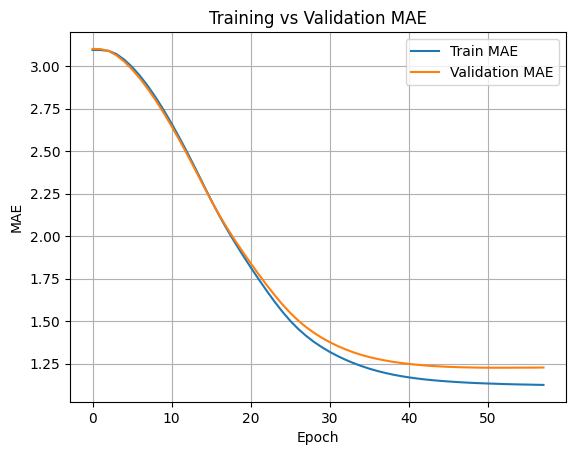

In [275]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('Training vs Validation MAE')
plt.legend()
plt.grid(True)
plt.show()

During model training, Image 5 shows a consistent reduction in both training and validation MAE. The validation MAE decreased from approximately 3.10 to 1.22 over the course of training, aligning with the test MAE result and indicating good generalization to unseen data.

### Make Recommendations for a User

Selects a sample user by encoded ID and retrieves their age and location information.  
Identifies places the user has visited and predicts ratings for unvisited candidate places using the trained model to generate top 10 new recommendations.  
Displays the user's top 5 highest-rated visited places alongside the recommended new places with relevant details.  


In [185]:
# Choose a sample user
user_id = 34  # must be encoded form (same as used in training)

# Get user’s real info (if available)
user_age = user_prep.loc[user_prep['User_Id'] == user_id, 'Age'].values[0]
user_location = user_prep.loc[user_prep['User_Id'] == user_id, 'Location'].values[0]

# Get places the user has already rated (visited)
visited_place_ids = rating_prep[rating_prep['User_Id'] == user_id]['Place_Id'].unique()

# Convert visited place_ids to encoded place indexes
visited_place_indexes = place_enc.transform(visited_place_ids)

# Candidate places: all places except those visited
all_place_indexes = np.arange(n_places)
candidate_places = np.setdiff1d(all_place_indexes, visited_place_indexes)

# Prepare inputs for candidate places
user_input = np.array([user_id] * len(candidate_places))
place_input = candidate_places

# Predict ratings for candidate places
preds = model.predict([user_input, place_input], verbose=0)

# Get top 10 recommendations (among candidate places)
top_idx_within_candidates = preds.flatten().argsort()[-10:][::-1]
top_place_indexes = candidate_places[top_idx_within_candidates]

# Decode encoded place indexes back to original Place_Id
recommended_place_ids = place_enc.inverse_transform(top_place_indexes)

# Get recommended place details
recommended_places = df[df['Place_Id'].isin(recommended_place_ids)][
    ['Place_Name', 'Category', 'City']
].drop_duplicates().reset_index(drop=True)

# Also show top 5 rated places by user
top_5_places = (
    rating_prep[rating_prep['User_Id'] == user_id]
    .sort_values(by='Place_Ratings', ascending=False)
    .head(5)
    [['Place_Name', 'Place_Ratings', 'Category', 'City']]
    .reset_index(drop=True)
)

# Display everything
print("USER INFORMATION")
print(f"User ID  : {user_id}")
print(f"Age      : {user_age}")
print(f"Location : {user_location}")
print("=" * 70)

print("TOP 5 PLACES ALREADY VISITED BY USER")
print(top_5_places)
print("=" * 70)

print("TOP 10 NEW PLACE RECOMMENDATIONS")
print(recommended_places)

USER INFORMATION
User ID  : 34
Age      : 31
Location : Sragen, Jawa Tengah
TOP 5 PLACES ALREADY VISITED BY USER
             Place_Name  Place_Ratings       Category        City
0   Jembatan Kota Intan              5         Budaya     Jakarta
1      Pulau Semak Daun              5         Bahari     Jakarta
2  Stone Garden Citatah              4  Taman Hiburan     Bandung
3   Museum Mpu Tantular              4         Budaya    Surabaya
4  Museum Gunung Merapi              4         Budaya  Yogyakarta
TOP 10 NEW PLACE RECOMMENDATIONS
                          Place_Name       Category        City
0                   Keraton Surabaya         Budaya    Surabaya
1                        Bukit Jamur     Cagar Alam     Bandung
2            Air Terjun Kedung Pedut     Cagar Alam  Yogyakarta
3               Desa Wisata Gamplong  Taman Hiburan  Yogyakarta
4                  Sanghyang Heuleut     Cagar Alam     Bandung
5              Monumen Yogya Kembali         Budaya  Yogyakarta
6         